# Word2Vec

In [28]:
import tensorflow as tf
import numpy as np

# Recolectando Datos


In [29]:
corpus = ['el rey es un hombre fuerte',
          'la reina es una mujer sabia',
          'niño es un hombre joven',
          'niña es una mujer joven',
          'principe es un rey joven',
          'princesa es una reina joven',
          'un hombre es fuerte',
          'una mujer es hermosa',
          'un principe es un niño que sera rey',
          'una princesa es una niña que sera reina']

# Quitando stop words


In [30]:
def remove_stop_words(corpus):
    stop_words = ['es', 'un', 'una', 'sera', 'el', 'la', 'que']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [36]:
corpus = remove_stop_words(corpus)
print(corpus)

['rey hombre fuerte', 'reina mujer sabia', 'niño hombre joven', 'niña mujer joven', 'principe rey joven', 'princesa reina joven', 'hombre fuerte', 'mujer hermosa', 'principe niño rey', 'princesa niña reina']


In [37]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)
print(words)

{'hermosa', 'niño', 'joven', 'hombre', 'principe', 'princesa', 'reina', 'mujer', 'fuerte', 'sabia', 'rey', 'niña'}


here we have word set by which we will have word vector

In [38]:
words

{'fuerte',
 'hermosa',
 'hombre',
 'joven',
 'mujer',
 'niña',
 'niño',
 'princesa',
 'principe',
 'reina',
 'rey',
 'sabia'}

# Skip gram


In [39]:
word2int = {}
for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    print(sentence)
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2
data = []
for sentence in sentences:
    #print(sentence)
    for idx, word in enumerate(sentence):
        #print(idx , word)
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                #print(word , neighbor)
                data.append([word, neighbor])

print(len(data))
print(word2int)

rey hombre fuerte
reina mujer sabia
niño hombre joven
niña mujer joven
principe rey joven
princesa reina joven
hombre fuerte
mujer hermosa
principe niño rey
princesa niña reina
52
{'hermosa': 0, 'niño': 1, 'joven': 2, 'hombre': 3, 'principe': 4, 'princesa': 5, 'reina': 6, 'mujer': 7, 'fuerte': 8, 'sabia': 9, 'rey': 10, 'niña': 11}


In [46]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'neighbor'])

rey hombre fuerte
reina mujer sabia
niño hombre joven
niña mujer joven
principe rey joven
princesa reina joven
hombre fuerte
mujer hermosa
principe niño rey
princesa niña reina


In [47]:
df.head(len(df))

,input,neighbor
0,rey,hombre
1,rey,fuerte
2,hombre,rey
3,hombre,fuerte
4,fuerte,rey
5,fuerte,hombre
6,reina,mujer
7,reina,sabia
8,mujer,reina
9,mujer,sabia


In [48]:
df.shape

(52, 2)

In [49]:
word2int

{'fuerte': 8,
 'hermosa': 0,
 'hombre': 3,
 'joven': 2,
 'mujer': 7,
 'niña': 11,
 'niño': 1,
 'princesa': 5,
 'principe': 4,
 'reina': 6,
 'rey': 10,
 'sabia': 9}

# Define Tensorflow Graph

In [50]:
ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word
#print("Word2Int: ",word2int)
#Se hacen los vectores por palabra de [1,0,0,0,...,0]
#El 1 va en la posicion de la palabra segun el vocabulario
for x, y in zip(df['input'], df['neighbor']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))
#print("X\n",X)
#print("Y\n",Y)

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)
#print("X: ",len(X_train),"\n",X_train)
#print("Y",len(Y_train),"\n",Y_train)


# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [51]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 25000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.451612
iteration 3000 loss is :  1.9018471
iteration 6000 loss is :  1.7979958
iteration 9000 loss is :  1.7687776
iteration 12000 loss is :  1.7516694
iteration 15000 loss is :  1.7395948
iteration 18000 loss is :  1.7306601
iteration 21000 loss is :  1.7239089
iteration 24000 loss is :  1.718632


In [52]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors[0])

[3.1482608 3.0260348]


# word vector in table

In [20]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,hermosa,3.217421,3.966009
1,niño,0.284048,-0.864716
2,joven,-1.023136,0.287757
3,hombre,1.980738,-4.724194
4,principe,1.269565,-3.146264
5,princesa,1.172249,1.107270
6,reina,0.738012,0.732875
7,mujer,0.398982,0.376532
8,fuerte,-4.184947,-1.889189
9,una,-1.333821,3.151918


# word vector in 2d chart

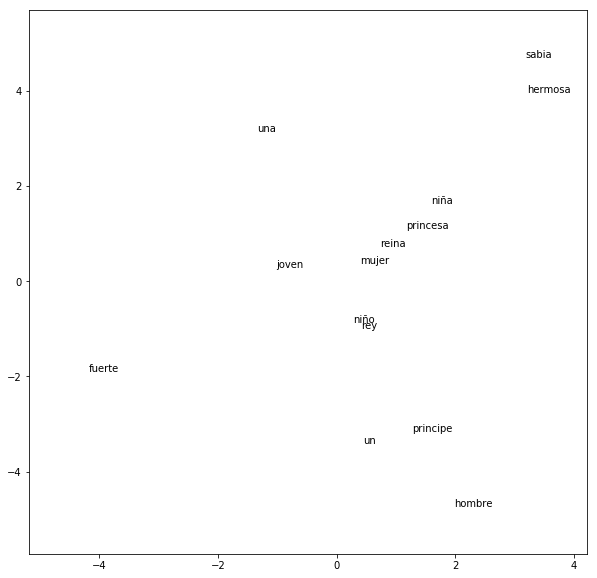

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (15,15)

plt.show()

In [23]:
word2dic = word2int
w2v_df

,word,x1,x2
0,hermosa,3.217421,3.966009
1,niño,0.284048,-0.864716
2,joven,-1.023136,0.287757
3,hombre,1.980738,-4.724194
4,principe,1.269565,-3.146264
5,princesa,1.172249,1.107270
6,reina,0.738012,0.732875
7,mujer,0.398982,0.376532
8,fuerte,-4.184947,-1.889189
9,una,-1.333821,3.151918


In [24]:
def Distance(w2v_df,word2dic,w1,w2):
    x1,y1 = w2v_df['x1'][word2dic[w1]],w2v_df['x2'][word2dic[w1]]
    x2,y2 = w2v_df['x1'][word2dic[w2]],w2v_df['x2'][word2dic[w2]]
    return ((y2-y1)**2+(x2-x1)**2)**.5

def KNN(K,w2v_df,word2dic,w):
    idw = word2dic[w]
    distances = []
    for i in range(len(word2dic)):
        wdist = []
        if i != idw:
            wdist.append(w2v_df['word'][i])
            wdist.append(Distance(w2v_df,word2dic,w,w2v_df['word'][i]))
            distances.append(wdist)
        
    distances = sorted(distances, key=lambda distance: distance[1])
    return distances[:K]
        

In [26]:
dist = Distance(w2v_df,word2dic,'niña','princesa')
print("Distancia: ",dist)

Distancia:  0.6779633503387493


In [27]:
KNN(5,w2v_df,word2dic,"niña")
#neighbors = KNN(5,w2v_df,word2dic,"rey")
#print(neighbors)

[['princesa', 0.6779633503387493],
 ['reina', 1.24567555866552],
 ['mujer', 1.737527020916081],
 ['niño', 2.8252344545098644],
 ['hermosa', 2.8379744057958]]